# Training CNNs for different tasks

In [2]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 1.4 MB/s eta 0:00:00:00:010:12m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 75.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 94.1 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 99.3 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.0/225.0 kB 18.7 MB/s eta 0:00:00


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)

y_test = to_categorical(y_test, 10)

# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adamw',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.3442 - loss: 1.7717 - val_accuracy: 0.5486 - val_loss: 1.2621
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.5756 - loss: 1.2013 - val_accuracy: 0.5698 - val_loss: 1.2307
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.6328 - loss: 1.0449 - val_accuracy: 0.6498 - val_loss: 0.9992
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.6722 - loss: 0.9422 - val_accuracy: 0.6684 - val_loss: 0.9557
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.7012 - loss: 0.8488 - val_accuracy: 0.6886 - val_loss: 0.9084
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.7314 - loss: 0.7682 - val_accuracy: 0.7035 - val_loss: 0.8672
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.7485 - loss: 0.7208 - val_accuracy: 0.6945 - val_loss: 0.9262
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.7602 - loss: 0.6885 - 

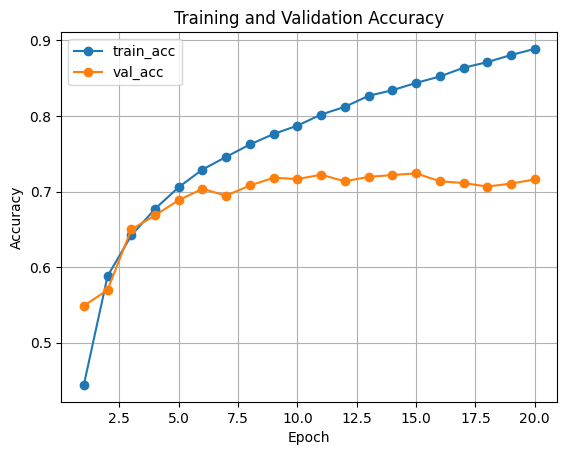

In [2]:
import matplotlib.pyplot as plt

acc = history.history.get('accuracy') or history.history.get('categorical_accuracy') or history.history.get('acc')
val_acc = history.history.get('val_accuracy') or history.history.get('val_categorical_accuracy') or history.history.get('val_acc')

if acc is None:
    print("No accuracy data in history. Available keys:", list(history.history.keys()))
else:
    epochs = range(1, len(acc) + 1)
    plt.figure()
    plt.plot(epochs, acc, marker='o', label='train_acc')
    if val_acc is not None:
        plt.plot(epochs, val_acc, marker='o', label='val_acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


In [5]:
#without normalization

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train, x_test = x_train, x_test 

# One-hot encode the labels
y_train = to_categorical(y_train, 10)

y_test = to_categorical(y_test, 10)

# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adamw',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history2 = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.3152 - loss: 2.3577 - val_accuracy: 0.4848 - val_loss: 1.4717
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.5275 - loss: 1.3115 - val_accuracy: 0.5714 - val_loss: 1.2061
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.6010 - loss: 1.1291 - val_accuracy: 0.6165 - val_loss: 1.0961
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.6393 - loss: 1.0192 - val_accuracy: 0.6430 - val_loss: 1.0479
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.6725 - loss: 0.9373 - val_accuracy: 0.6589 - val_loss: 1.0049
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.7032 - loss: 0.8535 - val_accuracy: 0.6511 - val_loss: 1.0213
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.7205 - loss: 0.8124 - val_accuracy: 0.6626 - val_loss: 0.9932
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.7507 - loss: 0.7205 - 

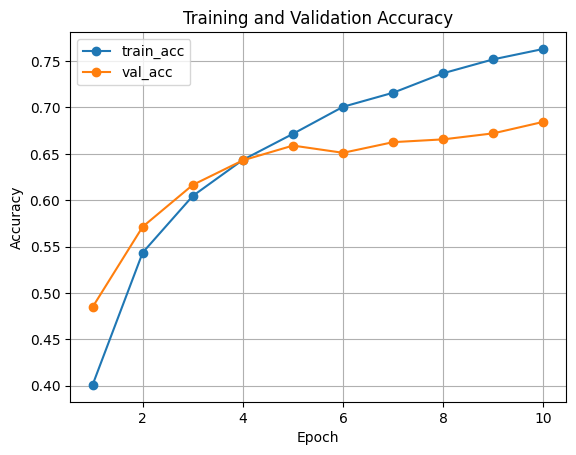

In [6]:
import matplotlib.pyplot as plt

acc = history2.history.get('accuracy') or history2.history.get('categorical_accuracy') or history2.history.get('acc')
val_acc = history2.history.get('val_accuracy') or history2.history.get('val_categorical_accuracy') or history2.history.get('val_acc')

if acc is None:
    print("No accuracy data in history. Available keys:", list(history2.history.keys()))
else:
    epochs = range(1, len(acc) + 1)
    plt.figure()
    plt.plot(epochs, acc, marker='o', label='train_acc')
    if val_acc is not None:
        plt.plot(epochs, val_acc, marker='o', label='val_acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


In [8]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [13]:
#without normalization

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train, x_test = x_train/255.0 , x_test/255.0 

# One-hot encode the labels
y_train = to_categorical(y_train, 10)

y_test = to_categorical(y_test, 10)

# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


# Using Sparse categorical CrossEntropy

### i was sparse instead of categorical which lead to giving valueerror as sparse expect indices but gets one hot encoding 
# Compile the model
model.compile(optimizer='adamw',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history3 = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.3673 - loss: 1.7291 - val_accuracy: 0.4934 - val_loss: 1.4406
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.5563 - loss: 1.2445 - val_accuracy: 0.5521 - val_loss: 1.2574
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.6206 - loss: 1.0804 - val_accuracy: 0.6195 - val_loss: 1.0758
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.6536 - loss: 0.9879 - val_accuracy: 0.5559 - val_loss: 1.2939
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.6800 - loss: 0.9140 - val_accuracy: 0.5958 - val_loss: 1.1874
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.6937 - loss: 0.8630 - val_accuracy: 0.6505 - val_loss: 0.9814
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.7065 - loss: 0.8291 - val_accuracy: 0.6541 - val_loss: 1.0014
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.7221 - loss: 0.7918 - 

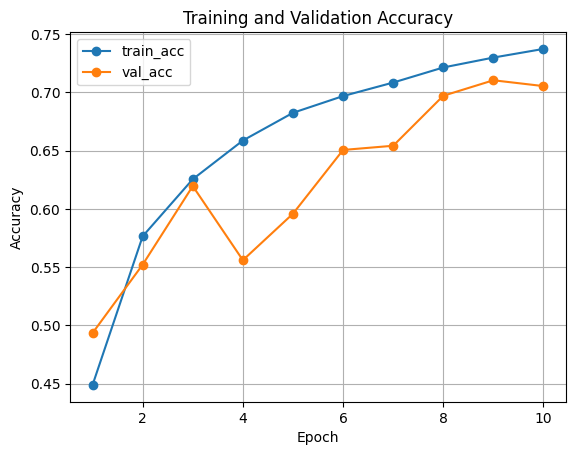

In [14]:
import matplotlib.pyplot as plt

acc = history3.history.get('accuracy') or history3.history.get('categorical_accuracy') or history3.history.get('acc')
val_acc = history3.history.get('val_accuracy') or history3.history.get('val_categorical_accuracy') or history3.history.get('val_acc')

if acc is None:
    print("No accuracy data in history. Available keys:", list(history3.history.keys()))
else:
    epochs = range(1, len(acc) + 1)
    plt.figure()
    plt.plot(epochs, acc, marker='o', label='train_acc')
    if val_acc is not None:
        plt.plot(epochs, val_acc, marker='o', label='val_acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


In [3]:
import numpy as np

# Define a simple 5x5 input matrix
input_matrix = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
])

# Define a 3x3 kernel (filter)
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

# Get the dimensions of the input and kernel
input_dim = input_matrix.shape
kernel_dim = kernel.shape

# Calculate the dimensions of the output matrix
output_dim = (input_dim[0] - kernel_dim[0] + 1, input_dim[1] - kernel_dim[1] + 1)

# Initialize the output matrix
output_matrix = np.zeros(output_dim)

# Perform the convolution operation
for i in range(output_dim[0]):
    for j in range(output_dim[1]):
        region = input_matrix[i:i + kernel_dim[0], j:j + kernel_dim[1]]
        output_matrix[i, j] = np.sum(region * kernel)

print("Input Matrix:")
print(input_matrix)
print("\nKernel:")
print(kernel)
print("\nOutput Matrix:")
print(output_matrix)

Input Matrix:
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]

Kernel:
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]

Output Matrix:
[[-6. -6. -6.]
 [-6. -6. -6.]
 [-6. -6. -6.]]
